## **COGNIFYZ TECHNOLOGIES MACHINE LEARNING INTERNSHIP TASK 1**

# *Step One: Import all Libraries*

In [110]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## *Step Two: Create a Wrangle Function for the Data Cleaning Process*

In [111]:
def wrangle(filepath):
    data = pd.read_csv(filepath)

    # Drop columns with low or high-cardinality
    data.drop(columns = ["Restaurant ID", "Restaurant Name"], inplace = True) # Dropped for its high cardinality
    data.drop("Address", axis = 1, inplace = True) # It doesn't add quality to the data
    data.drop("Locality Verbose", axis = 1, inplace = True) # Similar to the `Locality` column
    data.drop("Switch to order menu", axis = 1, inplace = True) # Dropped for its low cardinality
    data.drop(columns = ["Rating color", "Rating text"], inplace = True)

    # Encode the binary categorical features
    columns_names = ["Has Table booking", "Has Online delivery", "Is delivering now"]
    for column in columns_names:
        data[column] = data[column].map({"Yes": 0, "No": 1})
    
    return data

## *Import the Dataset with the Wrangle Function*

In [138]:
data = wrangle("Cognifyz_Dataset .csv")
data.head()

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),0,1,1,3,4.8,314
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),0,1,1,3,4.5,591
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),0,1,1,4,4.4,270
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),1,1,1,4,4.9,365
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),0,1,1,4,4.8,229


# *Task: Predict Aggregate Rating*

## *Step Three: Create the `X_train` and `y_train`*

In [129]:
# Split into train and test sets
X = data.drop("Aggregate rating", axis = 1)
y = data["Aggregate rating"]

## *Step Four: Encode the Categorical Features and Scale Numerical Features*

In [130]:
cat_features = ['Locality', "Currency", "City", 'Cuisines']
num_features = ['Average Cost for two', 'Votes', "Country Code"]
encoder = OneHotEncoder(drop = 'first', sparse_output = False)
scaler = StandardScaler()
transformer = ColumnTransformer([('cat', encoder, cat_features),
                                 ('num', scaler, num_features)],
                                 remainder = 'passthrough')
X = transformer.fit_transform(X)
X = pd.DataFrame(X)

In [127]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3182,3183,3184,3185,3186,3187,3188,3189,3190,3191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.006154,2.531111,121.027535,14.565443,0.0,1.0,1.0,3.0,314.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000049,2.531111,121.014101,14.553708,0.0,1.0,1.0,3.0,591.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.173743,2.531111,121.056831,14.581404,0.0,1.0,1.0,4.0,270.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018659,2.531111,121.056475,14.585318,1.0,1.0,1.0,4.0,365.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018659,2.531111,121.057508,14.584450,0.0,1.0,1.0,4.0,229.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.012358,2.531111,121.056314,14.583764,1.0,1.0,1.0,3.0,336.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.049676,2.531111,120.979667,14.531333,0.0,1.0,1.0,4.0,520.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.049676,2.531111,120.979333,14.540000,0.0,1.0,1.0,4.0,677.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.297809,2.531111,120.980090,14.552990,0.0,1.0,1.0,4.0,621.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.006154,2.531111,121.056532,14.572041,0.0,1.0,1.0,3.0,532.0


## *Step Five: Split into Train and Test sets, and Build the models*

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

## *1. Cat Boost Regressor*

In [141]:
model = CatBoostRegressor(iterations = 1000, 
                          depth = 12, 
                          learning_rate = 0.01, 
                          loss_function = 'RMSE', 
                          cat_features = [],
                          verbose = 100)

model.fit(X_train, y_train, verbose = 0)

y_pred = model.predict(X_test)

# Mean Squared Error
ct_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {ct_mse}')

# R-squared (coefficient of determination)
ct_r2 = r2_score(y_test, y_pred)
print(f'R-squared: {ct_r2}')

# Mean Absolute Error
ct_mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {ct_mae}')

Mean Squared Error: 0.08879388032425477
R-squared: 0.9626309898877674
Mean Absolute Error: 0.1960902124937152


## *2. Random Forest Regressor*

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08958378872318158
Mean Absolute Error: 0.19177524856096295
R-squared: 0.9622985559988616


## *3. Decision Tree Regressor*

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 42)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {dt_mse}')
print(f'Mean Absolute Error: {dt_mae}')
print(f'R-squared: {dt_r2}')

Mean Squared Error: 0.15276295133437992
Mean Absolute Error: 0.24767137624280486
R-squared: 0.9357095302926008


<Axes: >

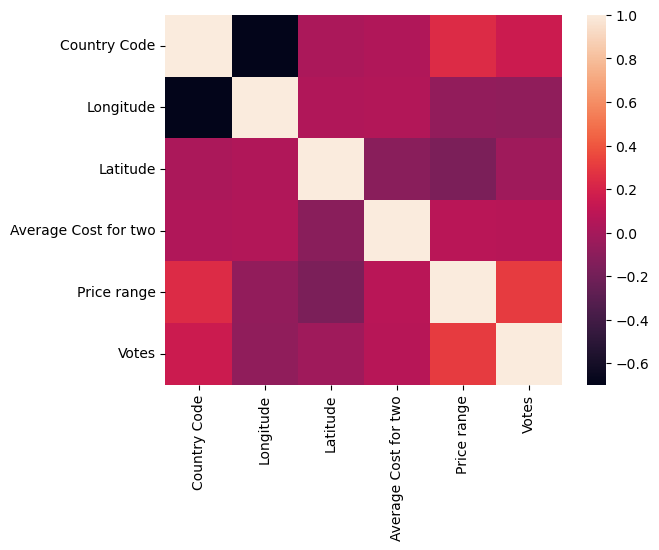

In [15]:
corr = data.select_dtypes("number").drop(columns = "Aggregate rating").corr()
sns.heatmap(corr)

## *Step Six: Compare Results of the Models*

In [145]:
import pandas as pd

# Store results
results = {
    f"Model": ["Cat Boost", "Random Forest", "Decision Tree"],
    f"Mean Squared Error": [ct_mse, rf_mse, dt_mse],
    f"Mean Absolute Error": [ct_mae, rf_mae, dt_mae],
    f"R2-Score": [ct_r2 * 100, rf_r2 * 100, dt_r2 * 100],
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.round(2)


,Model,Mean Squared Error,Mean Absolute Error,R2-Score
0,Cat Boost,0.09,0.20,96.26
1,Random Forest,0.09,0.19,96.23
2,Decision Tree,0.15,0.25,93.57


## *Step Seven: Fine-Tune the Best Model Using GridSearch*

In [25]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Set up the hyperparameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for splits
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Generate all possible combinations of parameters using ParameterGrid
param_combinations = list(ParameterGrid(param_grid))

# Track best model and score
best_score = float('inf')
best_params = None
best_model = None

# Loop over all parameter combinations
for i, params in tqdm(enumerate(param_combinations), total=len(param_combinations), desc="Grid Search Progress"):
    # Update the regressor with the current parameter set
    model = RandomForestRegressor(**params, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # If this score is better than the current best, update the best score and best model
    if mse < best_score:
        best_score = mse
        best_params = params
        best_model = model

# Print the best parameters and the corresponding score
print("\nBest parameters found: ", best_params)
print(f"Best Mean Squared Error: {best_score}")

# Evaluate the best model's performance on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Grid Search Progress: 100%|██████████| 432/432 [1:37:37<00:00, 13.56s/it]  


Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Mean Squared Error: 0.15774150874324086
Mean Squared Error: 0.15774150874324086
Mean Absolute Error: 0.3109590964590964
R-squared: 0.9320315409645558
